## Problem Statement:
This dataset utilizes data from 2014 Major League Baseball seasons in order to develop an algorithm that predicts the number of wins for a given team in the 2015 season based on several different indicators of success. There are 16 different features that will be used as the inputs to the machine learning and the output will be a value that represents the number of wins. 

-- Input features: Runs, At Bats, Hits, Doubles, Triples, Homeruns, Walks, Strikeouts, Stolen Bases, Runs Allowed, Earned Runs, Earned Run Average (ERA), Shutouts, Saves, Complete Games and Errors

-- Output: Number of predicted wins (W)

To understand the columns meaning, follow the link given below to understand the baseball statistics: https://en.wikipedia.org/wiki/Baseball_statistics

In [1]:
#importing the libraries
import math
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

import warnings
warnings.filterwarnings('ignore')

In [2]:
#importing all the necessary libraries

from sklearn.preprocessing import PowerTransformer
from sklearn.preprocessing import StandardScaler
from statsmodels.stats.outliers_influence import variance_inflation_factor
 
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score

from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor, AdaBoostRegressor

from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error

## The Data 
First step in analysing the data, building and predicting the model is to get the data to convertible format.

In [3]:
#converting the csv file into dataframe to load the data and perform analysis
data = pd.read_csv('baseball.csv')

#reading top five records from the datasets
data.head()

,W,R,AB,H,2B,3B,HR,BB,SO,SB,RA,ER,ERA,CG,SHO,SV,E
0,95,724,5575,1497,300,42,139,383,973,104,641,601,3.73,2,8,56,88
1,83,696,5467,1349,277,44,156,439,1264,70,700,653,4.07,2,12,45,86
2,81,669,5439,1395,303,29,141,533,1157,86,640,584,3.67,11,10,38,79
3,76,622,5533,1381,260,27,136,404,1231,68,701,643,3.98,7,9,37,101
4,74,689,5605,1515,289,49,151,455,1259,83,803,746,4.64,7,12,35,86


In [4]:
#checking the rows and column values in dataset
data.shape

(30, 17)

In [5]:
#getting the statistics of data, we can have overview of the data how data is spread over entire datasets
data.describe()

,W,R,AB,H,2B,3B,HR,BB,SO,SB,RA,ER,ERA,CG,SHO,SV,E
count,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000,30.00000,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000
mean,80.966667,688.233333,5516.266667,1403.533333,274.733333,31.300000,163.633333,469.100000,1248.20000,83.500000,688.233333,635.833333,3.956333,3.466667,11.300000,43.066667,94.333333
std,10.453455,58.761754,70.467372,57.140923,18.095405,10.452355,31.823309,57.053725,103.75947,22.815225,72.108005,70.140786,0.454089,2.763473,4.120177,7.869335,13.958889
min,63.000000,573.000000,5385.000000,1324.000000,236.000000,13.000000,100.000000,375.000000,973.00000,44.000000,525.000000,478.000000,2.940000,0.000000,4.000000,28.000000,75.000000
25%,74.000000,651.250000,5464.000000,1363.000000,262.250000,23.000000,140.250000,428.250000,1157.50000,69.000000,636.250000,587.250000,3.682500,1.000000,9.000000,37.250000,86.000000
50%,81.000000,689.000000,5510.000000,1382.500000,275.500000,31.000000,158.500000,473.000000,1261.50000,83.500000,695.500000,644.500000,4.025000,3.000000,12.000000,42.000000,91.000000
75%,87.750000,718.250000,5570.000000,1451.500000,288.750000,39.000000,177.000000,501.250000,1311.50000,96.500000,732.500000,679.250000,4.220000,5.750000,13.000000,46.750000,96.750000
max,100.000000,891.000000,5649.000000,1515.000000,308.000000,49.000000,232.000000,570.000000,1518.00000,134.000000,844.000000,799.000000,5.040000,11.000000,21.000000,62.000000,126.000000


In [6]:
#checking the null values using 'isnull' function
data.isnull().sum()

W      0
R      0
AB     0
H      0
2B     0
3B     0
HR     0
BB     0
SO     0
SB     0
RA     0
ER     0
ERA    0
CG     0
SHO    0
SV     0
E      0
dtype: int64

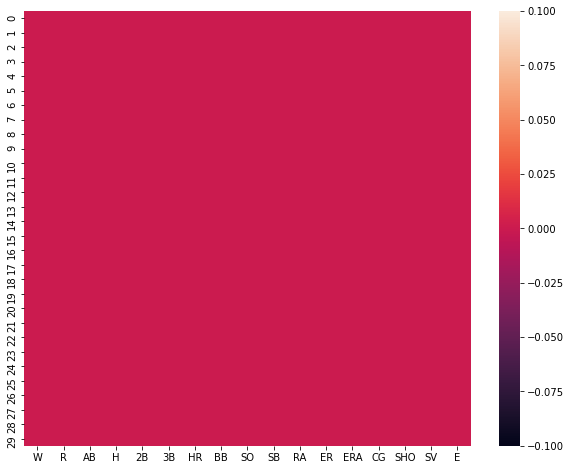

In [7]:
plt.figure(figsize=(10,8))
sns.heatmap(data.isnull())
plt.show()

## Observations:
1. There are less number of row and columns in data set which helps in understanding the dataset well.
2. As number of rows and columns are less we can manually analyse that there are NO missing values also confirmed by 'isnull' function
3. Refering to the output of 'describe' function we get to know that there seems no outliers on overview and the mean and median are nearest.

## Exploratory Data Analysis:
Let us make the data suitable to make inference on the data and make decisions 

In [8]:
#changing the names of columns to the abrevations
data.columns=['Wins', 'Runs', 'At_Bats', 'Hits', 'Doubles', 'Triples', 'Homeruns', 'Walks', 'Strikeouts', 'Stolen_Bases', 'Runs_Allowed', 'Earned_Runs', 'Earned_Run_Average_ERA', 'Shutouts', 'Saves', 'Complete_Games', 'Errors']

In [9]:
data

,Wins,Runs,At_Bats,Hits,Doubles,Triples,Homeruns,Walks,Strikeouts,Stolen_Bases,Runs_Allowed,Earned_Runs,Earned_Run_Average_ERA,Shutouts,Saves,Complete_Games,Errors
0,95,724,5575,1497,300,42,139,383,973,104,641,601,3.73,2,8,56,88
1,83,696,5467,1349,277,44,156,439,1264,70,700,653,4.07,2,12,45,86
2,81,669,5439,1395,303,29,141,533,1157,86,640,584,3.67,11,10,38,79
3,76,622,5533,1381,260,27,136,404,1231,68,701,643,3.98,7,9,37,101
4,74,689,5605,1515,289,49,151,455,1259,83,803,746,4.64,7,12,35,86
5,93,891,5509,1480,308,17,232,570,1151,88,670,609,3.80,7,10,34,88
6,87,764,5567,1397,272,19,212,554,1227,63,698,652,4.03,3,4,48,93
7,81,713,5485,1370,246,20,217,418,1331,44,693,646,4.05,0,10,43,77
8,80,644,5485,1383,278,32,167,436,1310,87,642,604,3.74,1,12,60,95
9,78,748,5640,1495,294,33,161,478,1148,71,753,694,4.31,3,10,40,97


### Data Visualization
Using the graphs let us understand how each and other attributes are related and how are they contributing in predicting target variable

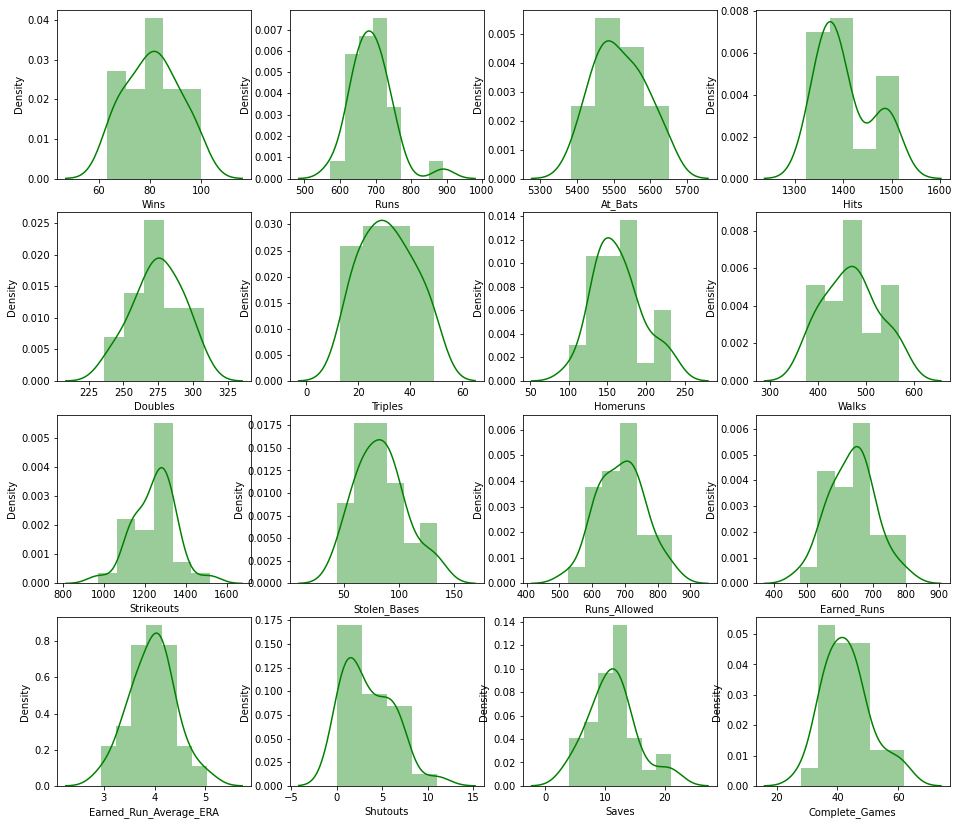

In [10]:
#let us plot graph to understand the distribution of the datasets individually 
pltnum=1 
plt.figure(figsize=(16,18))
for col in data:
    if pltnum<17:
        ax=plt.subplot(5,4,pltnum)
        sns.distplot(data[col],color='green')
        pltnum+=1
    
plt.show()

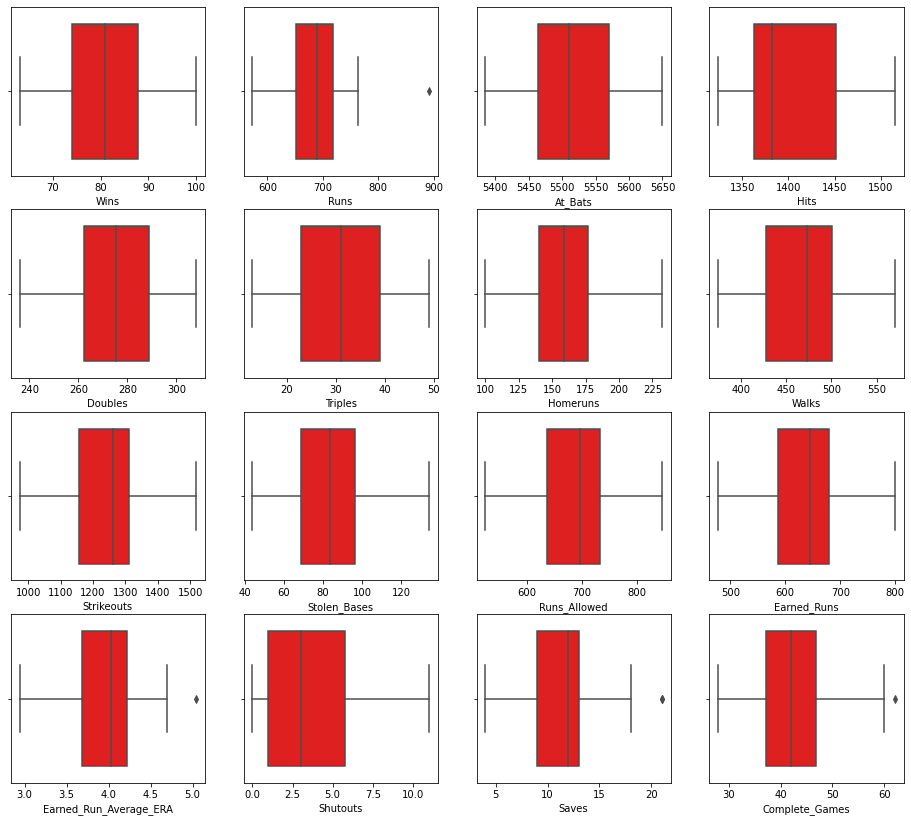

In [11]:
#Using Box plot graph, we understand the range where the data sets lie and if any outliers present in the data
pltnum=1 
plt.figure(figsize=(16,18))
for col in data:
    if pltnum<17:
        ax=plt.subplot(5,4,pltnum)
        sns.boxplot(data[col],color='red')
        pltnum+=1
    
plt.show()

<Figure size 1080x1080 with 0 Axes>

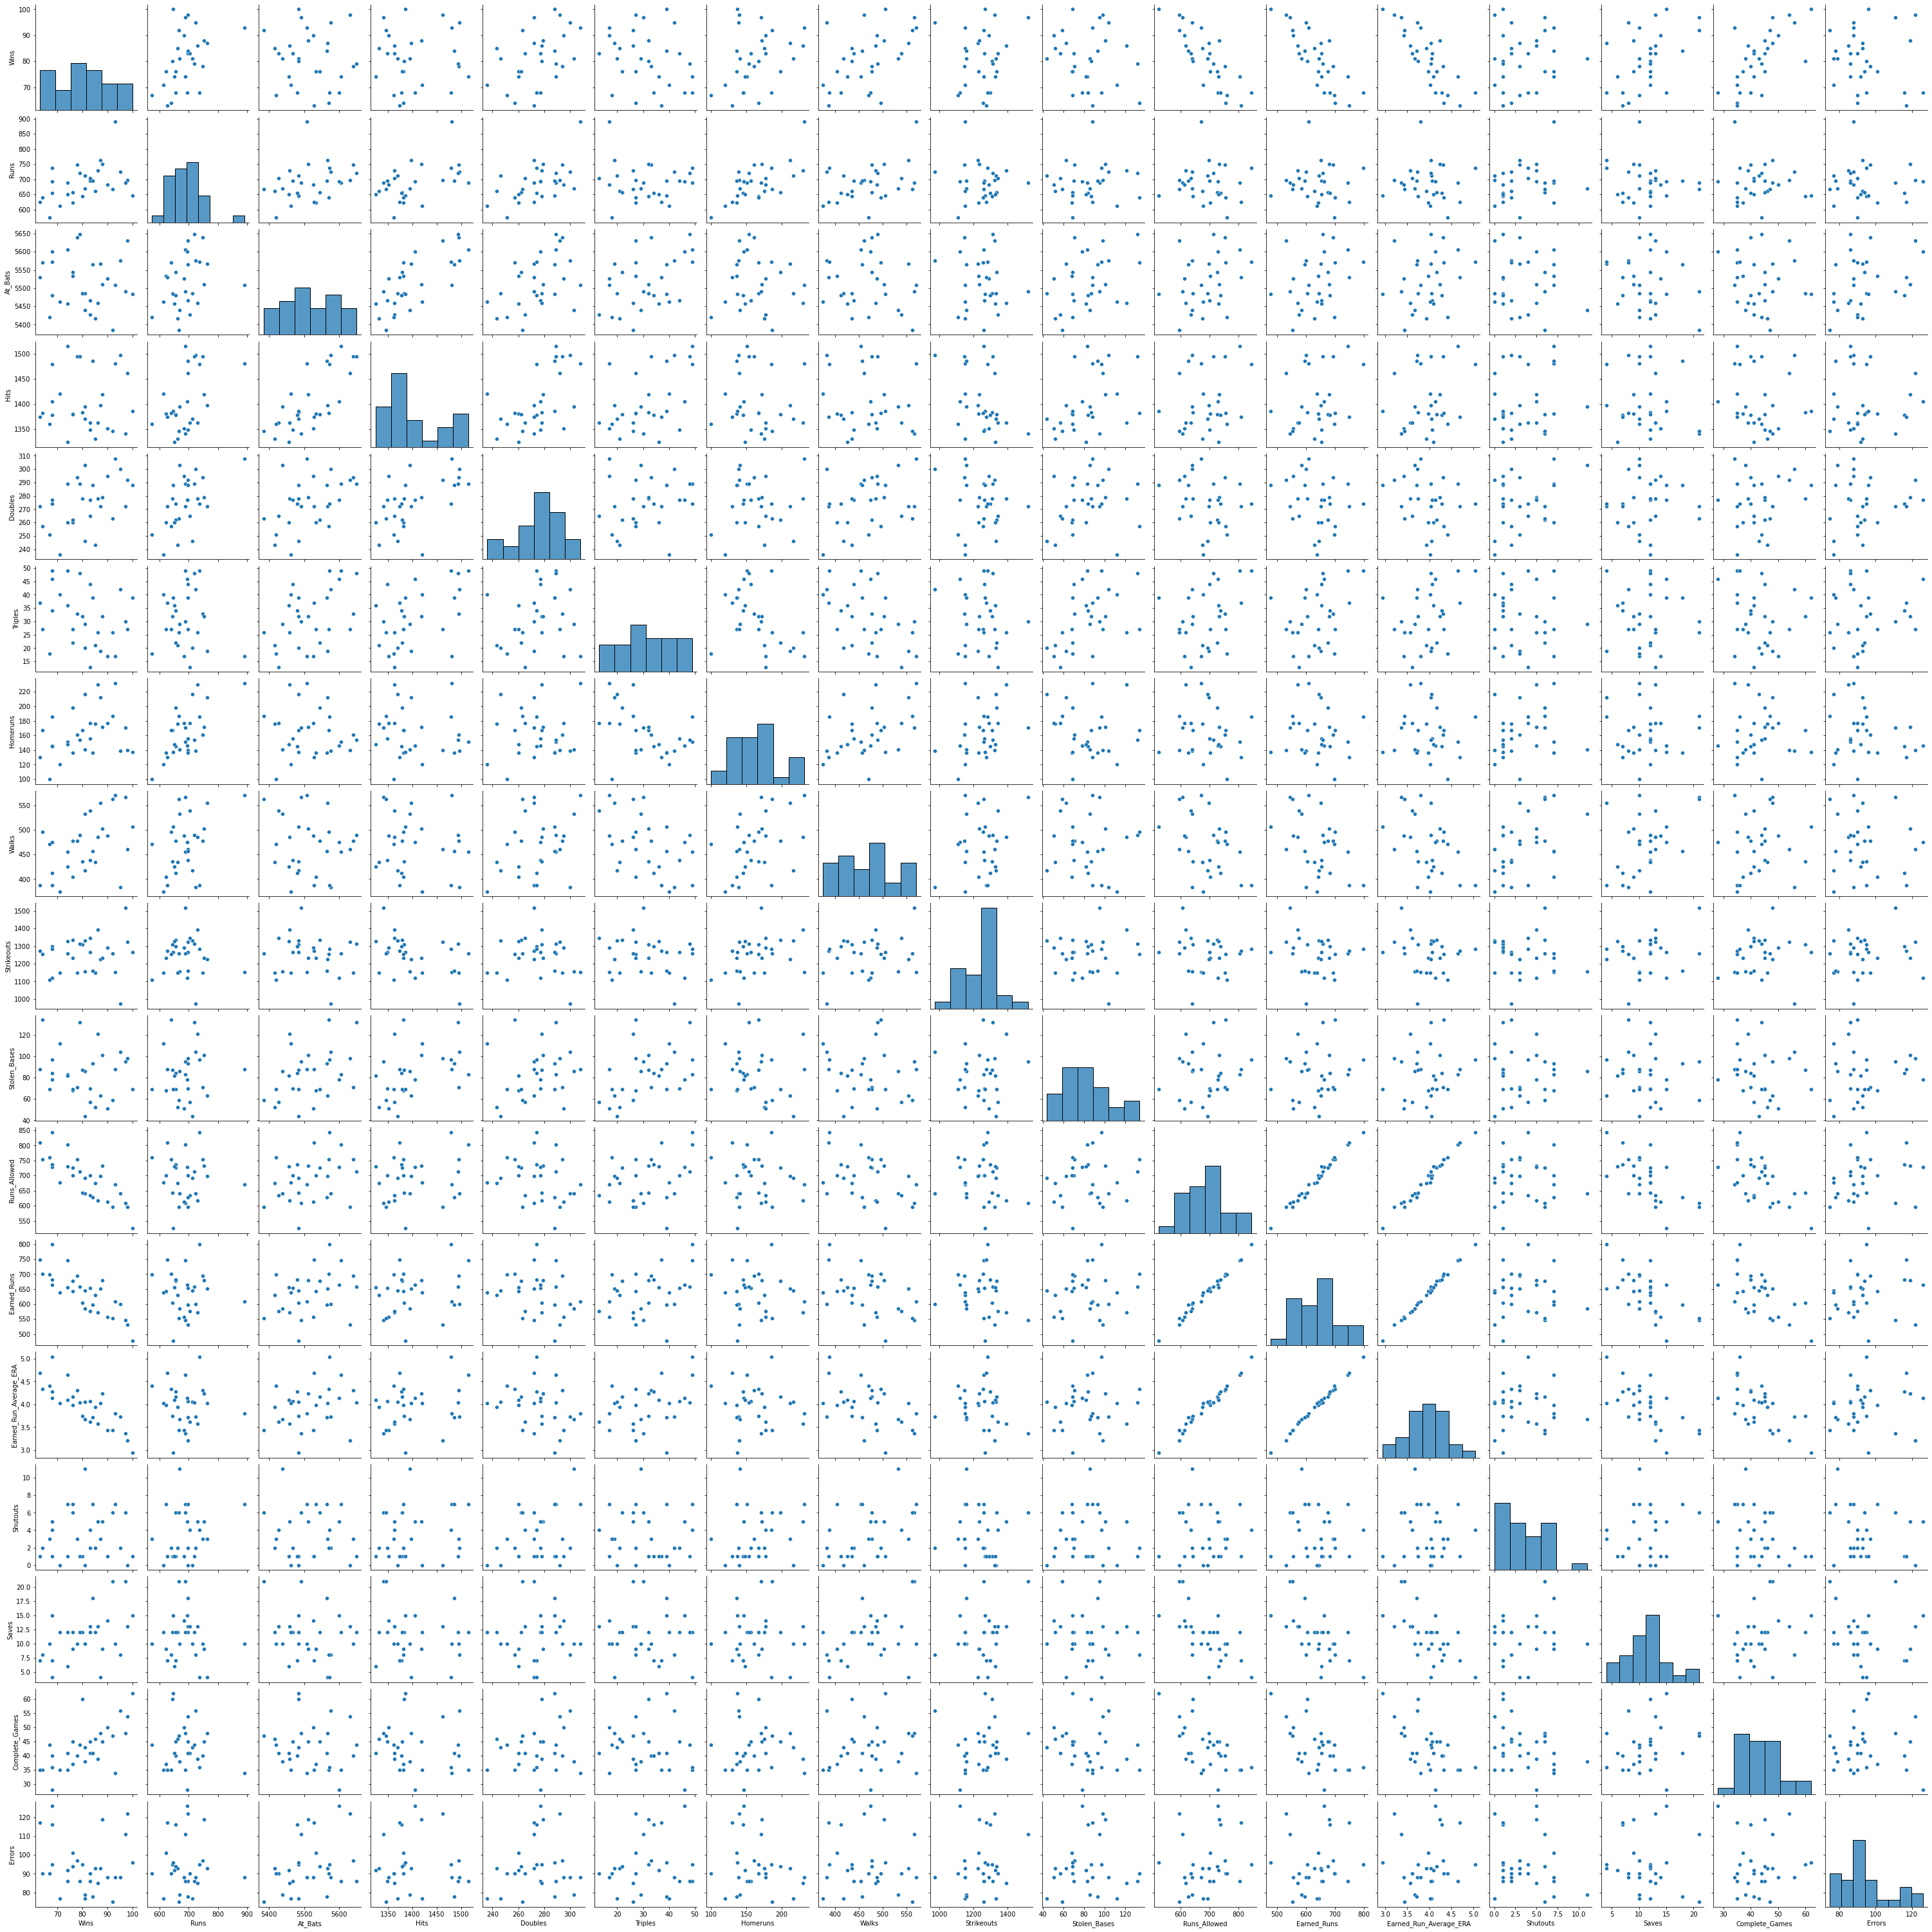

In [12]:
#visualizing the relationship of attributes using pairplot
plt.figure(figsize=(15,15))
sns.pairplot(data)
plt.show()

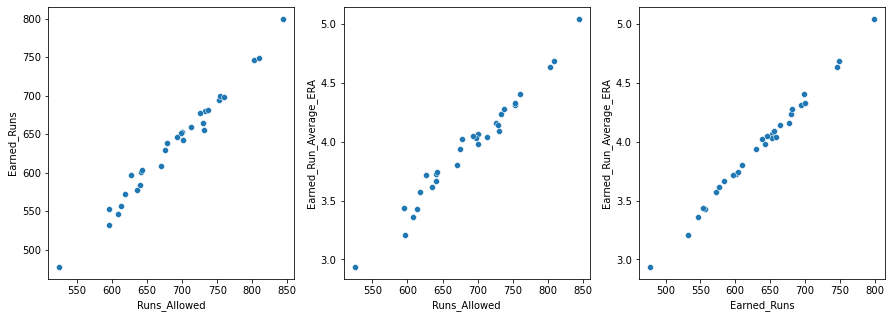

In [13]:
#visualizing the relationship of attributes using pairplot
plt.figure(figsize=(15,5))
ax = plt.subplot(1,3,1)
sns.scatterplot(x='Runs_Allowed',y='Earned_Runs',data=data)
ax = plt.subplot(1,3,2)
sns.scatterplot(x='Runs_Allowed',y='Earned_Run_Average_ERA',data=data)

ax = plt.subplot(1,3,3)
sns.scatterplot(x='Earned_Runs',y='Earned_Run_Average_ERA',data=data)

plt.show()

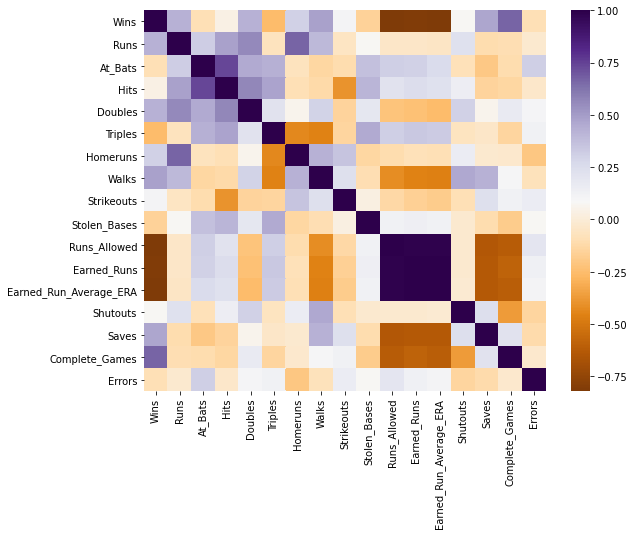

In [14]:
corr = data.corr()
plt.figure(figsize=(9,7))
sns.heatmap(corr,cmap='PuOr')
plt.show()

## Observations on graphs:

1. It seems all the attributes look normally distributed except "Runs, Saves, Errors, Complete_Games, Shoutouts" have some skewness in data. 
2. As the rows and columns of data is small,Very few outliers in some attributes "Runs, Earned_runs_Average, Saves
3. 3 attributes "Earned_Runs, Earned_Runs_Average, Runs Allowed" are highly correlated which is evident from graphs and VIF table. Removing these attributes from model might improve the model accuracy.
4. As Runs_Allowed, Earned_Runs and Earned_Run_Average_ERA are correlated, we can remove the attribute with highest multicollinearity, without any affect on model prediction accuracy.

### Bi-variate analysis:

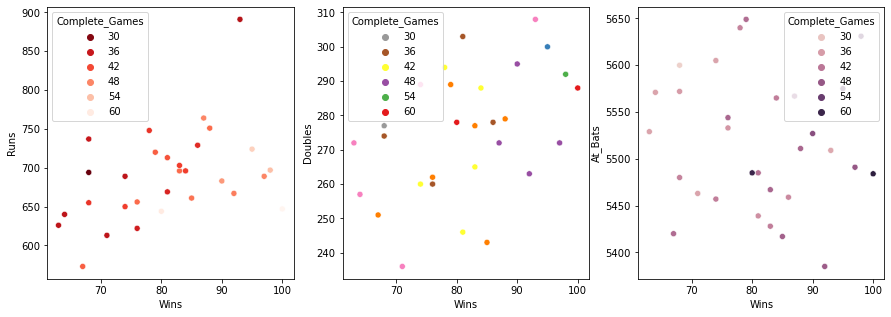

In [15]:
#visualizing Runs and Wins attributes with hue of Complete games 

plt.figure(figsize=(15,5))
ax = plt.subplot(1,3,1)
sns.scatterplot(y='Runs',x='Wins',hue='Complete_Games',data=data,palette='Reds_r')

#visualizing Doubles and Wins attributes with hue of Complete games 
ax = plt.subplot(1,3,2)
sns.scatterplot(x='Wins',y='Doubles',hue='Complete_Games',data=data, palette='Set1_r')

#visualizing At bats and Wins attributes with hue of Complete games 
ax = plt.subplot(1,3,3)
sns.scatterplot(y='At_Bats',x='Wins',hue='Complete_Games',data=data)

plt.show()

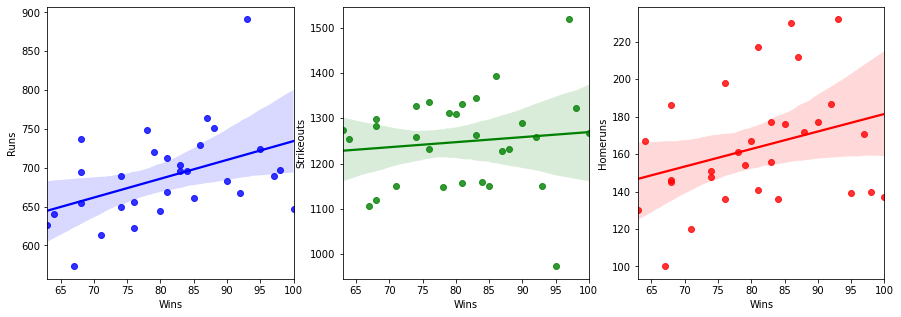

In [16]:
#Using reg plot, understanding relationship between following attributes 
plt.figure(figsize=(15,5))
plt.subplot(1,3,1)
sns.regplot(x='Wins',y='Runs',data=data,color='b')

plt.subplot(1,3,2)
sns.regplot(x='Wins',y='Strikeouts',data=data,color='g')

plt.subplot(1,3,3)
sns.regplot(x='Wins',y='Homeruns',data=data,color='r')

plt.show()

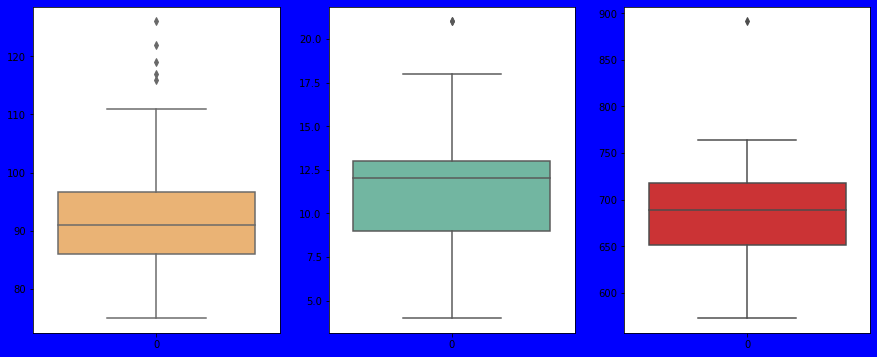

In [17]:
#Checking for Outliers using visualization plots
plt.figure(figsize=(15,6), facecolor='blue')
ax=plt.subplot(1,3,1)
sns.boxplot(data=data['Errors'], palette='Set3_r')

ax=plt.subplot(1,3,2)
sns.boxplot(data=data['Saves'], palette='Set2')

ax=plt.subplot(1,3,3)
sns.boxplot(data=data['Runs'], palette='Set1')

plt.show()


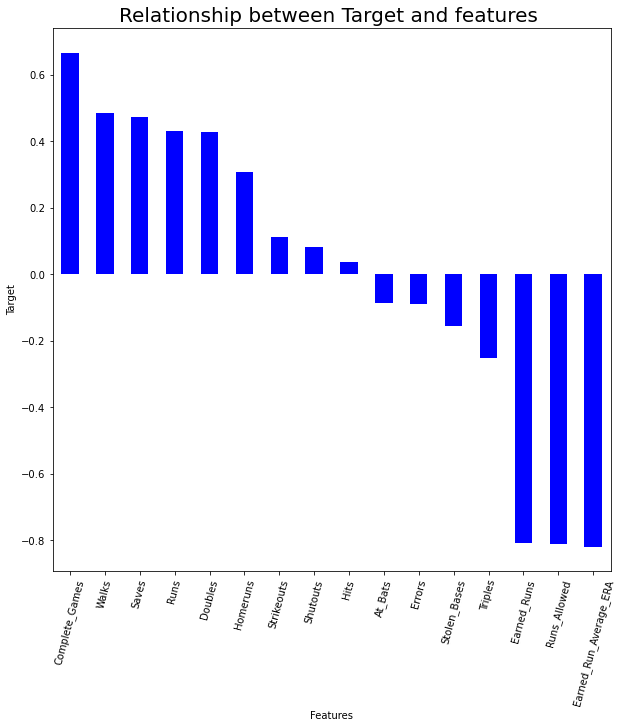

In [18]:
plt.figure(figsize=(10,10))
data.corr()['Wins'].sort_values(ascending=False).drop(['Wins']).plot(kind='bar', color='blue')
plt.xlabel('Features',fontsize=10)
plt.ylabel('Target',fontsize=10)
plt.xticks(rotation=75)
plt.title('Relationship between Target and features ',fontsize=20)
plt.show()

###  Handling Outliers
Using  Zscore to find outliers and treat outliers

In [19]:
from scipy.stats import zscore
z_score = zscore(data[['Errors','Saves','Runs']])
abs_sc = np.abs(z_score)
#len(data['Errors']),len(data['Saves'],len(data['Runs']))

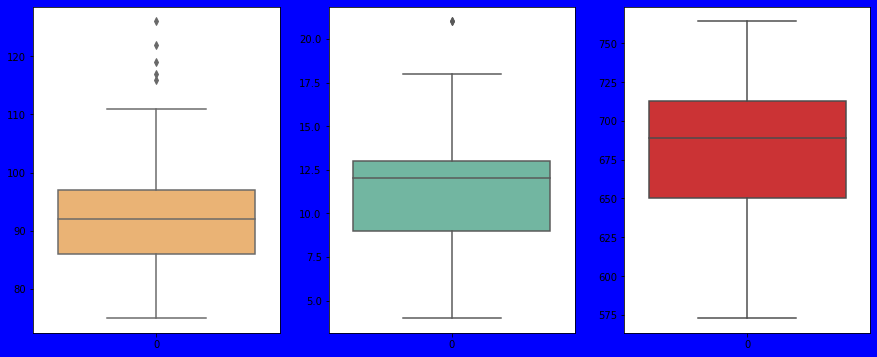

In [20]:
filtr = (abs_sc<3).all(axis=1)
data = data[filtr]

#checking the outliers
plt.figure(figsize=(15,6), facecolor='blue')
ax=plt.subplot(1,3,1)
sns.boxplot(data=data['Errors'], palette='Set3_r')

ax=plt.subplot(1,3,2)
sns.boxplot(data=data['Saves'], palette='Set2')

ax=plt.subplot(1,3,3)
sns.boxplot(data=data['Runs'], palette='Set1')

plt.show()

In [21]:
#checking for skewness
data.skew()

Wins                      0.119013
Runs                     -0.215364
At_Bats                   0.169573
Hits                      0.783772
Doubles                  -0.335304
Triples                   0.090124
Homeruns                  0.450862
Walks                     0.151193
Strikeouts               -0.233815
Stolen_Bases              0.494966
Runs_Allowed              0.018155
Earned_Runs               0.018461
Earned_Run_Average_ERA    0.016693
Shutouts                  0.854980
Saves                     0.526943
Complete_Games            0.627480
Errors                    0.840271
dtype: float64

In [22]:
#Treating these attributes with log transformation
data['Runs']=np.log(data['Runs']) 
data['Complete_Games']=np.log(data['Complete_Games'])
data['Errors']=np.log(data['Errors'])
data['Saves']=np.log(data['Saves'])

In [23]:
#checing the skewness
data.skew()

Wins                      0.119013
Runs                     -0.388698
At_Bats                   0.169573
Hits                      0.783772
Doubles                  -0.335304
Triples                   0.090124
Homeruns                  0.450862
Walks                     0.151193
Strikeouts               -0.233815
Stolen_Bases              0.494966
Runs_Allowed              0.018155
Earned_Runs               0.018461
Earned_Run_Average_ERA    0.016693
Shutouts                  0.854980
Saves                    -0.726124
Complete_Games            0.096752
Errors                    0.583308
dtype: float64

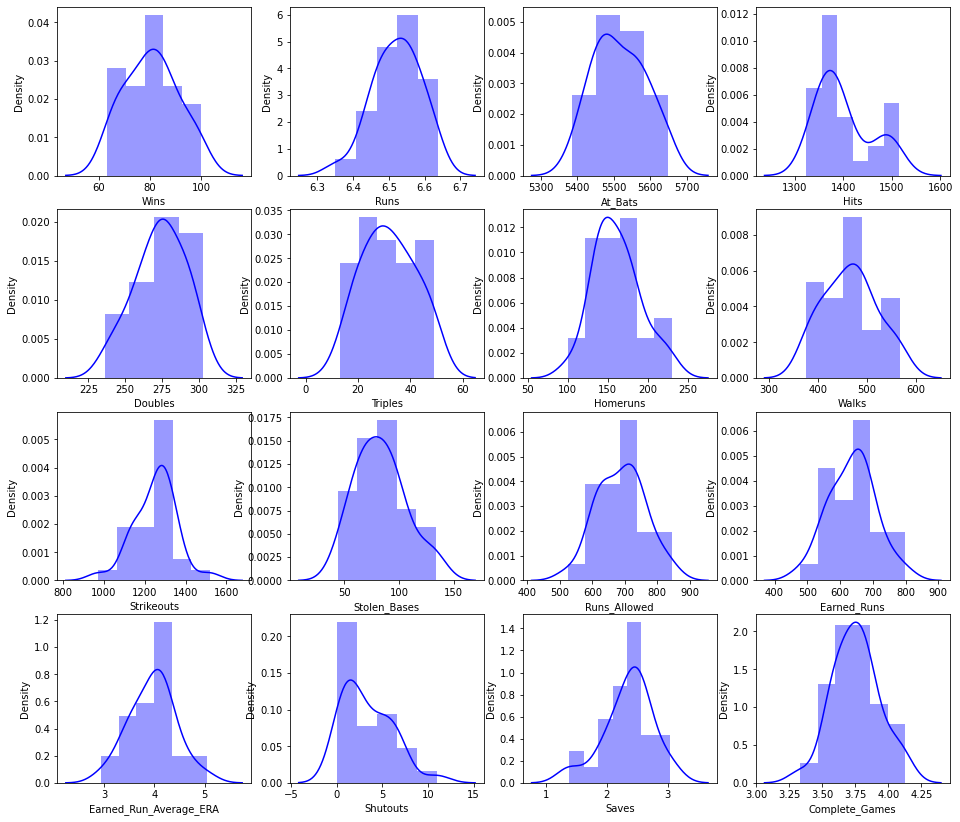

In [24]:
pltnum=1 
plt.figure(figsize=(16,18))
for col in data:
    if pltnum<17:
        ax=plt.subplot(5,4,pltnum)
        sns.distplot(data[col],color='blue')
        pltnum+=1
    
plt.show()

#### After removing the outliers and treating the skewness of the data. It seems good to proceed with Model Building

In [25]:
#splitting independent features and Target variables, also taking the results from VIF: removing highly correlated variables
X=data.drop(columns=['Wins','Runs_Allowed','Earned_Runs','Earned_Run_Average_ERA'],axis=1)
y=data['Wins']

In [26]:
scaler= StandardScaler()
X_scaled = scaler.fit_transform(X)

In [27]:
#checking for the multicollinearity between the independent features
vif =pd.DataFrame()
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X_scaled,i) for i in range(X_scaled.shape[1])]

In [28]:
vif

,Features,VIF
0,Runs,6.146220
1,At_Bats,5.047486
2,Hits,7.405555
3,Doubles,3.094326
4,Triples,2.616985
5,Homeruns,6.108923
6,Walks,2.721242
7,Strikeouts,2.072889
8,Stolen_Bases,1.597027
9,Shutouts,2.517217


Using the Variance Inflation information, we've removed highly correlated features from the independent variables

## Model Building

Creating individual train, test datasets

In [29]:
#Selecting best random state
max_acc = 0
max_RS = 0
for i in range(1, 250):
    X_train, X_test, y_train, y_test = train_test_split(X_scaled,y, test_size=0.3, random_state=i)
    lin_mod = LinearRegression()
    lin_mod.fit(X_train,y_train)
    predict = lin_mod.predict(X_test)
    acc = r2_score(y_test, predict)
    if acc>max_acc:
        max_acc = acc
        max_RS=i
print('Max accuracy:',max_acc,'for random state of', max_RS)

Max accuracy: 0.8549113441454413 for random state of 97


## 1. Linear Regression

In [30]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=97)
lm= LinearRegression()
lm.fit(X_train, y_train)
y_pred = lm.predict(X_test)

print("***********RESULTS***********")
print('The r2score:',r2_score(y_test, y_pred))
print('The mean Abs error:',mean_absolute_error(y_test, y_pred))
print('The mean squared error:',mean_absolute_error(y_test, y_pred))
print('The RMS error:',np.sqrt(mean_absolute_error(y_test, y_pred)))

cv = cross_val_score(lm,X, y,cv = 5)
print(cv)

print('The cross validation score of model:', cv.mean())
print("*****************************")

***********RESULTS***********
The r2score: 0.8549113441454392
The mean Abs error: 3.151953617979555
The mean squared error: 3.151953617979555
The RMS error: 1.7753742191379132
[-0.27273795 -1.57424973  0.44857442  0.74123567  0.53353407]
The cross validation score of model: -0.02472870575495243
*****************************


## 2. Random Forest Algorithm

In [31]:
random_forest = RandomForestRegressor()
random_forest.fit(X_train, y_train)
y_pred = random_forest.predict(X_test)

print("***********RESULTS***********")
print('The r2score:',r2_score(y_test, y_pred))
print('The mean Abs error:',mean_absolute_error(y_test, y_pred))
print('The mean squared error:',mean_absolute_error(y_test, y_pred))
print('The RMS error:',np.sqrt(mean_absolute_error(y_test, y_pred)))

cv = cross_val_score(random_forest,X, y,cv = 5)
print(cv)

print('The cross validation score of model:', cv.mean())
print("*****************************")

***********RESULTS***********
The r2score: 0.4248777570093458
The mean Abs error: 7.0022222222222235
The mean squared error: 7.0022222222222235
The RMS error: 2.6461712382652456
[ 0.41888568 -3.72899342  0.34880276  0.26729426  0.79272907]
The cross validation score of model: -0.38025632963836414
*****************************


## 3. Gradient Boost Regression

In [32]:
gbr = GradientBoostingRegressor()
gbr.fit(X_train, y_train)
y_pred = gbr.predict(X_test)

print("***********RESULTS***********")
print('The r2score:',r2_score(y_test, y_pred))
print('The mean Abs error:',mean_absolute_error(y_test, y_pred))
print('The mean squared error:',mean_absolute_error(y_test, y_pred))
print('The RMS error:',np.sqrt(mean_absolute_error(y_test, y_pred)))

cv = cross_val_score(gbr,X, y,cv = 5)
print(cv)

print('The cross validation score of model:', cv.mean())
print("*****************************")

***********RESULTS***********
The r2score: 0.4140638951223051
The mean Abs error: 7.100456725634639
The mean squared error: 7.100456725634639
The RMS error: 2.6646682205547916
[-0.14928754 -5.12856411  0.50869072  0.49651716  0.50331648]
The cross validation score of model: -0.7538654595698671
*****************************


## 4. AdaBoost Regression

In [33]:
ada_boost = AdaBoostRegressor()
ada_boost.fit(X_train, y_train)
y_pred = ada_boost.predict(X_test)

print("***********RESULTS***********")
print('The r2score:',r2_score(y_test, y_pred))
print('The mean Abs error:',mean_absolute_error(y_test, y_pred))
print('The mean squared error:',mean_absolute_error(y_test, y_pred))
print('The RMS error:',np.sqrt(mean_absolute_error(y_test, y_pred)))

cv = cross_val_score(ada_boost,X, y,cv = 5)
print(cv)

print('The cross validation score of model:', cv.mean())
print("*****************************")

***********RESULTS***********
The r2score: 0.617998961578401
The mean Abs error: 5.981481481481481
The mean squared error: 5.981481481481481
The RMS error: 2.4457067447839043
[ 0.2764765  -4.10309302  0.25211854  0.2243304   0.78237683]
The cross validation score of model: -0.5135581499340445
*****************************


Out of above algorithms trained, the Linear Model fits the best.
Let us tune the model and check if we can improve accuracy

In [34]:
#applying GridsearchCV to improve accuracy
par_grid =  {'fit_intercept':[True,False], 'normalize':[True,False], 'copy_X':[True, False]}
grid_lm = GridSearchCV(estimator=lm, param_grid=par_grid, cv=5,n_jobs=1, verbose=1)

grid_lm.fit(X_train, y_train)

Fitting 5 folds for each of 8 candidates, totalling 40 fits


GridSearchCV(cv=5, estimator=LinearRegression(), n_jobs=1,
             param_grid={'copy_X': [True, False],
                         'fit_intercept': [True, False],
                         'normalize': [True, False]},
             verbose=1)

In [35]:
#predicting the results
print("The best estimators:", grid_lm.best_estimator_)
print("The best parameters:", grid_lm.best_params_)

The best estimators: LinearRegression(fit_intercept=False, normalize=True)
The best parameters: {'copy_X': True, 'fit_intercept': False, 'normalize': True}


In [36]:
#RE INSTANTIATING WITH BEST PARAMETERS
grid_lm = LinearRegression(copy_X=True, fit_intercept=True, normalize=True)
grid_lm.fit(X_train, y_train)
y_pred1 = lm.predict(X_test)

print("*******************Results********************")
print('The r2 score is:', r2_score(y_test, y_pred1))
print('The mean absolute error', mean_absolute_error(y_test, y_pred1))
print('The mean squared error', mean_squared_error(y_test, y_pred1))
print('root mean square error', np.sqrt(mean_squared_error(y_test, y_pred1)))
cv = cross_val_score(grid_lm, X,y,cv=5)
print('The cross validation score', cv.mean())

print("\n*****************XXXXXXXXXXX********************")

*******************Results********************
The r2 score is: 0.8549113441454392
The mean absolute error 3.151953617979555
The mean squared error 17.249429084931123
root mean square error 4.15324320079274
The cross validation score -0.024728705754948677

*****************XXXXXXXXXXX********************


## Saving the best model

In [37]:
#save the model
import pickle

#open a file where you want to store the dat
file = open('Baseball_casestudy.pkl','wb')

In [38]:
#dump the information to the file
pickle.dump(grid_lm,file)